In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [37]:
TOPICS = ["Astronomy", "Health", "Economy"]
TOPICS_MAP = {"Astronomy": 0, "Health": 1, "Economy": 2}

In [38]:
def create_dataset(topics):
    data = {'hash':[],'topic': [], 'text': []}
    for topic in topics:
        for file in os.listdir(topic):
            with open(f"{topic}/{file}", "r", encoding="utf-8") as f:
                text = f.read()
                data['hash'].append(file)
                data['topic'].append(topic)
                data['text'].append(text)
    return pd.DataFrame(data)

data = create_dataset(TOPICS)
data

,hash,topic,text
0,09d01585d21facc6f893ec9c64a6d79ffc107be243f10d...,Astronomy,may helpful receive news updates notifications...
1,13b89536b1d956c602e3318d61c91433c01081c0fd4baa...,Astronomy,magazinesdirect.com ( opens new tab ) huge ran...
2,5322449ca75317d29c0a85aa917457a0c7224782cb6a60...,Astronomy,best star projectors bring night sky inside ei...
3,700533859a015bc1bd956d20d2156c7201624e7c646cd5...,Astronomy,think best binoculars provide observers bright...
4,72593dbc72e599d63ad9e74dae52dc6d84818f75ea6ef1...,Astronomy,"purchase links site , may earn affiliate commi..."
5,747621e8902b9219771ecf7e12ae4db280c580892820a5...,Astronomy,"’ looking versatile , mobile camera setup , ’ ..."
6,84655c052b05d98f6f3b046e3d55d88c86c9c386378720...,Astronomy,looking best lego star wars deals ? 've come r...
7,a08683b7fa0a1c186bd0764b110101dad89f280f6383c9...,Astronomy,'ve rounded best telescopes stargazing compreh...
8,ad842cfe7ef3b4adc992d6f4bff7bef54e747030ade48c...,Astronomy,"order planets solar system , starting nearest ..."
9,b7fcbfdb8efd071adc35935e3af2d0292be63031a9f2d3...,Astronomy,moon strewn minuscule beads glass formed billi...


In [39]:
def preprocess(data,topics_map):
    tokenizer = RegexpTokenizer(r'\w+')
    data['text'] = data['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
    data['text'] = data['text'].apply(lambda x: ' '.join(x))
    data['label'] = data['topic'].map(topics_map)
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess(data,TOPICS_MAP)
X_train

31    prices come companies passing extra costs maki...
29    cholesterol type lipid waxy fat like substance...
20    attention deficit hyperactivity disorder adhd ...
41    latest storiesdividend stock provides investor...
2     best star projectors bring night sky inside ei...
43    blackberry posts us 495 million loss q4 due im...
18    copd makes harder breathe symptoms may mild fi...
15    causes chronic pain everyone experiences occas...
22    risk developing cancer also increases age gene...
16    though depression grief share features depress...
40    federal reserve continued hike rates month mar...
8     order planets solar system starting nearest su...
13    2023 busy year spaceflight exploration enthusi...
5     looking versatile mobile camera setup want kee...
17    allergy immune system response foreign substan...
32    could complicate bank canada s job economists ...
14    space com premier source space exploration inn...
35    canadian dollar edged lower u s counterpar

In [40]:
def create_tf_idf(X_train,X_test):
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf
X_train_tfidf, X_test_tfidf = create_tf_idf(X_train,X_test)
X_train_tfidf

<36x7482 sparse matrix of type '<class 'numpy.float64'>'
	with 17503 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def cross_validate_and_train(model,X_train_tfidf,y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score,average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1_score': make_scorer(f1_score, average='macro')}
    K_folds = 5
    cv_results = cross_validate(model, X_train_tfidf, y_train, cv=K_folds, scoring=scoring, return_estimator=True)
    for i in range(K_folds):
        print(f"Fold: {i+1}")
        print(f"Accuracy: {cv_results['test_accuracy'][i]}")
        print(f"Precision: {cv_results['test_precision'][i]}")
        print(f"Recall: {cv_results['test_recall'][i]}")
        print(f"F1 Score: {cv_results['test_f1_score'][i]}")
        print("\n")
    print("Mean Metrics")
    print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
    print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")
    print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
    print(f"Mean F1 Score: {np.mean(cv_results['test_f1_score'])}")

    mean_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring.keys()}
    best_metric = max(mean_scores, key=mean_scores.get)
    best_estimator_index= np.argmax(cv_results['test_'+best_metric])
    best_estimator = cv_results['estimator'][best_estimator_index]
    print(f"Best Estimator: {best_estimator_index}")
    return best_estimator

In [61]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay, RocCurveDisplay
def test_model(model,X_test_tfidf,y_test, plot=False):
    print("Test Metrics")
    y_pred = model.predict(X_test_tfidf)
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    if plot:
        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
        plt.show()
    return report

Model: SVC
Fold: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 2
Accuracy: 0.8571428571428571
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 Score: 0.8666666666666667


Fold: 3
Accuracy: 0.8571428571428571
Precision: 0.8888888888888888
Recall: 0.8333333333333334
F1 Score: 0.8222222222222223


Fold: 4
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Mean Metrics
Mean Accuracy: 0.9428571428571428
Mean Precision: 0.9555555555555555
Mean Recall: 0.9444444444444444
Mean F1 Score: 0.9377777777777778
Best Estimator: 0
Test Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      

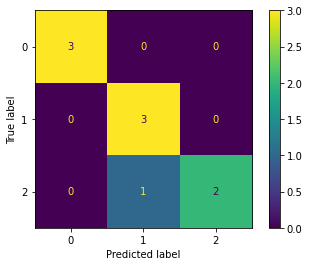



Model: KNeighborsClassifier
Fold: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 4
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 5
Accuracy: 0.8571428571428571
Precision: 0.9166666666666666
Recall: 0.8333333333333334
F1 Score: 0.8412698412698413


Mean Metrics
Mean Accuracy: 0.9714285714285713
Mean Precision: 0.9833333333333334
Mean Recall: 0.9666666666666666
Mean F1 Score: 0.9682539682539681
Best Estimator: 0
Test Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



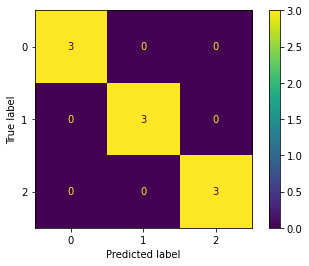



Model: DecisionTreeClassifier
Fold: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 2
Accuracy: 0.8571428571428571
Precision: 0.9166666666666666
Recall: 0.8333333333333334
F1 Score: 0.8412698412698413


Fold: 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 4
Accuracy: 0.8571428571428571
Precision: 0.8888888888888888
Recall: 0.8333333333333334
F1 Score: 0.8222222222222223


Fold: 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Mean Metrics
Mean Accuracy: 0.9428571428571428
Mean Precision: 0.961111111111111
Mean Recall: 0.9333333333333333
Mean F1 Score: 0.9326984126984128
Best Estimator: 0
Test Metrics
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       

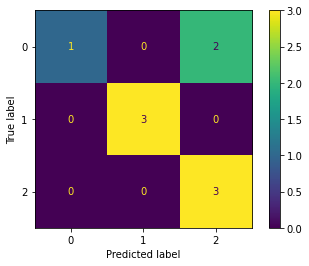



Model: LogisticRegression
Fold: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 3
Accuracy: 0.8571428571428571
Precision: 0.8888888888888888
Recall: 0.8333333333333334
F1 Score: 0.8222222222222223


Fold: 4
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Fold: 5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Mean Metrics
Mean Accuracy: 0.9714285714285715
Mean Precision: 0.9777777777777779
Mean Recall: 0.9666666666666668
Mean F1 Score: 0.9644444444444445
Best Estimator: 0
Test Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



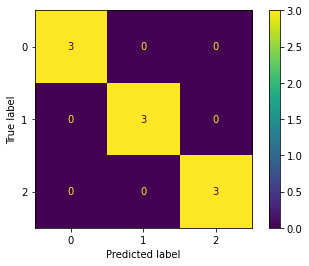

In [62]:
def train_and_test_models(X_train_tfidf,y_train,X_test_tfidf,y_test):
    models = [SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),LogisticRegression()]
    reports = {}
    for model in models:
        print(f"Model: {model.__class__.__name__}")
        best_estimator = cross_validate_and_train(model,X_train_tfidf,y_train)
        report = test_model(best_estimator,X_test_tfidf,y_test,plot=True)
        reports[model.__class__.__name__] = [best_estimator,report]
        print("\n")
    return reports
reports = train_and_test_models(X_train_tfidf,y_train,X_test_tfidf,y_test)

In [68]:
def choose_best_model(reports):
    #Choose best model based on highest accuracy, precision, recall and f1 score
    best_model = None
    best_score = 0
    model_name = None
    for model in reports:
        report = reports[model][1]
        score = report['accuracy'] + report['macro avg']['precision'] + report['macro avg']['recall'] + report['macro avg']['f1-score']
        if score > best_score:
            best_score = score
            best_model = reports[model][0]
            model_name = model
    return model_name, best_model
model_name, best_model = choose_best_model(reports)
print(f"Best Model: {model_name}")

Best Model: KNeighborsClassifier


In [79]:
probs = best_model.predict_proba(X_test_tfidf)
for prob in probs:
    print(prob)

[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[0.8 0.  0.2]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 0. 1.]


In [ ]:
def save_model(model):
    joblib.dump(model, "classifier.joblib")